## Homework 01
---
Tópicos abordados:
- Conversão RGB para GRAY
- Modelo aditivo de ruído
- Filtragem espacial

**Imagem de referência**

A imagem contida na variável `rgb` do cógido abaixo em Python será a imagem de referência para este **Homework**. 



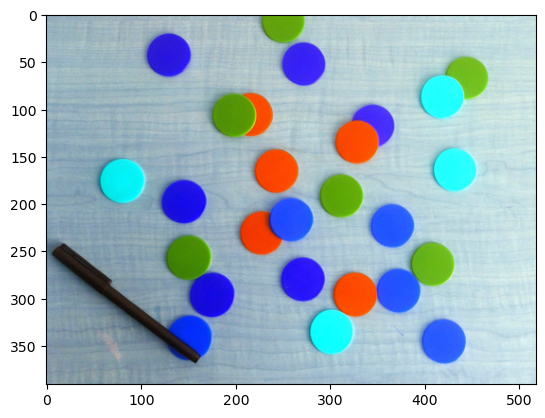

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#image_fname = "images/rgb.ppm";
image_fname = "images/coloredChips.png";

rgb = cv.imread( image_fname );
plt.imshow(rgb);

### **Questão 01)** Organização de imagens coloridas

Uma imagem colorida é comummente organizada em 3 matrizes, denominadas canais Red(R), Green(G) e Blue(B), cada uma representando a intensidade luminosa de sua cor correspondente. Assim, um *pixel* colorido é representado por um vetor de intensidades com os canais R, G e B. Na representação RGB, a intensidade de cada *pixel* varia de 0 a 255, sendo 0 a ausência de luminosidade e 255 o brilho máximo do canal. Escreva o código em Python que apresente as componentes R, G, e B da imagem `rgb` de referência. Use a função `subplot` do **Matplotlib** para criar uma linha com 4 imagens, sendo a primeira a imagem de referência e as três últimas os canais R, G e B, respectivamente.

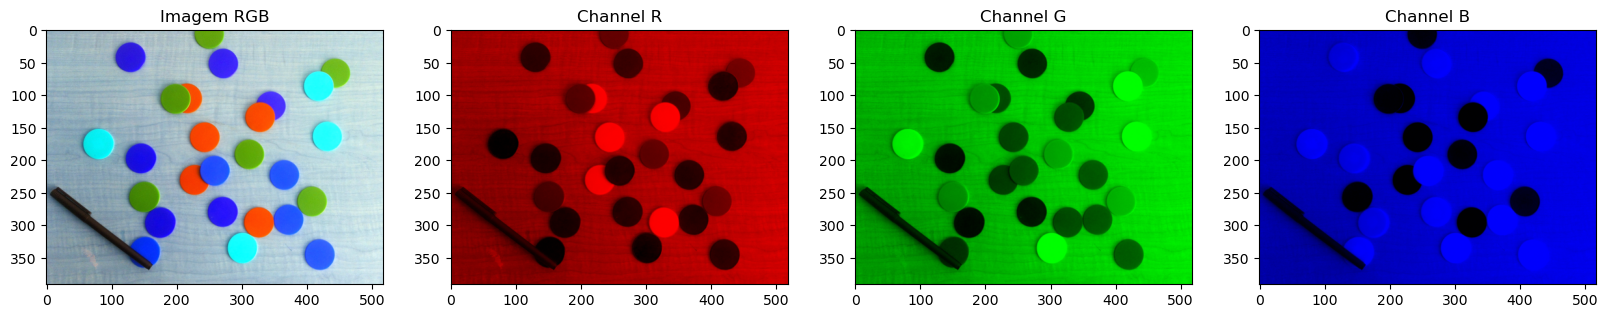

In [2]:
# Atente para a importação do pacote pyplot que já está disponível neste contexto como plt

R,G,B = cv.split(rgb)
zeros = np.zeros(rgb.shape[:2], dtype="uint8")

r_image = cv.merge([R,zeros,zeros])
g_image = cv.merge([zeros,G,zeros])
b_image = cv.merge([zeros,zeros,B])

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(rgb)
plt.title("Imagem RGB");

plt.subplot(142)
plt.imshow(r_image)
plt.title("Channel R");

plt.subplot(143)
plt.imshow(g_image)
plt.title("Channel G");

plt.subplot(144)
plt.imshow(b_image)
plt.title("Channel B");

### **Questão 02)** Imagem em escala de cinza

Uma imagem em escala de cinza é representada por uma única matriz que contém intensidade de luz do espectro visível para cada *pixel*. Desse modo, em termos mais simples, o valor de cinza de um *pixel* pode ser computado pela média aritmética dos canais R, G e B. Como os cones R, G e B possuem sensibilidades diferentes à luz, o valor de cinza que mais se aproxima da percepção humana é dado pela média ponderada dos canais R, G e B de acordo com a seguinte equação:

$$ gray = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B $$

Para este tópico de estudo, implemente a funcao `rgb2gray` para converter uma imagem RGB e retornar a imagem correspondente em escala de cinza e compare com a função disponibilizada pela **OpenCV**. Ela disponibiliza a função `cv.cvtColor` que permite realizar a conversão em diversos espaços de cores. Crie duas imagens em escala de cinza, `gray` resultante da função `rgb2gray`, esta será a imagem de referência em escala de cinza, e a imagem `gray_cv`, resultante da função `cv.cvtColor`, em seguida, apresente uma linha com 3 figuras usando a biblioteca **Matplotlib**, sendo a primeira a imagem `gray`, a segunda a imagem `gray_cv` e a última uma imagem que contém a diferênça entre as duas imagens geradas.

*Obs.* Na biblioteca **OpenCV**, os *pixels* coloridos podem ser organizados na ordem RGB ou BGR, esse último por questões históricas e também por conveniência de representação numérica de números inteiros em memória. Desse modo, verifique o código de conversão adequado para a sua versão do **OpenCV** e escolha entre `COLOR_RGB2GRAY` e `COLOR_BGR2GRAY` observando a decomposição dos canais RGB na figura anterior.

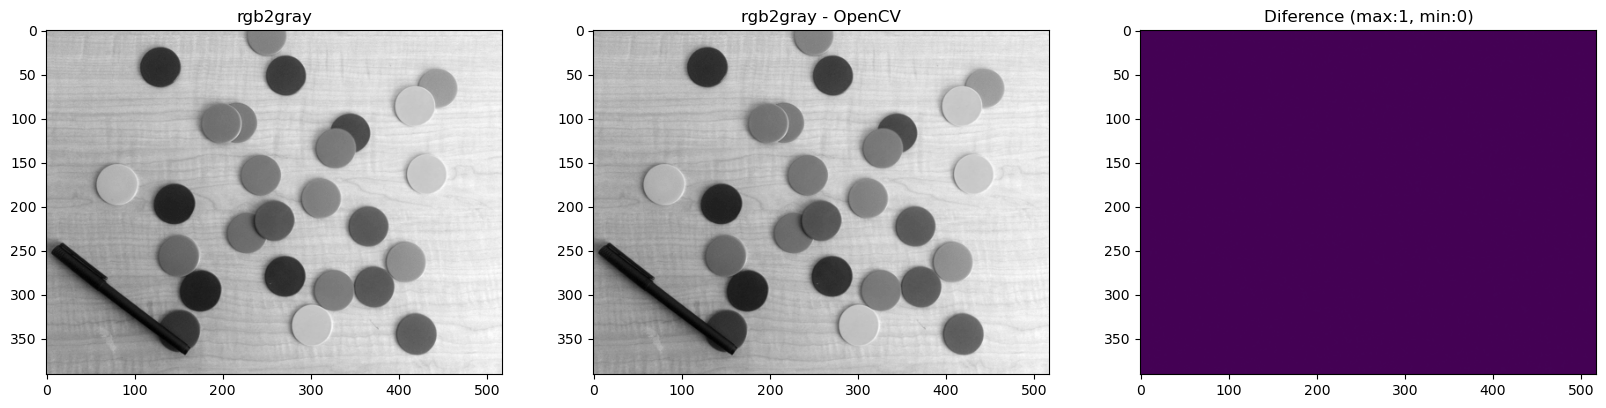

In [3]:
# Complete com seu código

def rgb2gray( rgb ) :
    """
    rgb - imagem colorida no formato RGB com intensidades variando de 0 -- 255 para cada canal
    return - imagem em escala de cinza com intensidades variando de 0 -- 255
    """
    R,G,B  = cv.split(rgb)
    gray = 0.2989*R +0.5870*G + 0.1140*B

    return gray.astype(np.uint8)


gray_cv = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY);
# gray_cv = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY);
gray = rgb2gray(rgb);

# --- Apresentação do resultado --- #
plt.figure(figsize=(20,20));
# ---
plt.subplot(131)
plt.imshow(gray, cmap="gray");
plt.title("rgb2gray");
# ---
plt.subplot(132);
plt.imshow(gray_cv, cmap="gray");
plt.title("rgb2gray - OpenCV");
# ---
plt.subplot(133);
dif = np.abs(gray_cv-gray);
plt.imshow(dif,vmin=0,vmax=255);
tt = "Diference (max:" + str(np.max(dif)) + ", min:" + str(np.min(dif)) + ")";
plt.title(tt);

### **Questão 03)** Modelo de Ruído Aditivo

Implemente a função `build_uniform_noise_from_snr_db` que calcula o ruído uniforme a ser adicionado a uma imagem de referência que gere a relação SNRdb desejada. A função tem como entrada a relação sinal ruído em db (`SNRdb`), a potência do sinal de referência (`Ps`) e as dimensões do sinal a ser gerado (`shape`). Como acessório, implemente também a função `power` que retorna a potência de um sinal de entrada. Nomeie as imagens corrompidas por ruído como `gray_25db` e `gray_10db`.

In [4]:
def build_uniform_noise_from_snr_db( SNRdb, Ps, shape ) :
    """
    SNRdb - Relação sinal ruído em db
    Ps - Potência do sinal de referência
    shape - dimensões do sinal de ruído. Este deve ser idêntico ao sinal de referência para permitir a adição do ruído na próxima etapa.
    return N - Ruído gerado
    """
    # Pn = np.power(10, (np.log10(Ps) - (SNRdb/10)))
    Pn_db = 10*np.log10(Ps) - SNRdb
    Pn = np.power(10,(Pn_db/10))

    N = np.random.uniform(-1,1,shape) * 255 * np.sqrt(Pn)
        
    return N

def power( signal ) :
    """
    return Pw - Potência do sinal de entrada
    """
    Pw = np.power(signal,2).sum()/np.prod(np.asarray(signal.shape))

    return Pw


Nu_25db = build_uniform_noise_from_snr_db( 25, power(gray), gray.shape );
Nu_10db = build_uniform_noise_from_snr_db( 10, power(gray), gray.shape );

# Codigo para remover valores fora da faixa de intensidades de pixels (0--255)
gray_25db = gray + Nu_25db;
gray_25db[ gray_25db<0 ] = 0;
gray_25db[ gray_25db>255 ] = 255;
gray_25db = gray_25db.astype(np.uint8);

gray_10db = gray + Nu_10db;
gray_10db[ gray_10db<0 ] = 0;
gray_10db[ gray_10db>255 ] = 255;
gray_10db = gray_10db.astype(np.uint8);

**Apresentação do resultado**

Crie um código que apresenta os resultados da injeção de ruído uniforme de modo controlado na imagem de referência em escala de cinza `gray`.
Gere os ruídos uniformes de 25db e 5db em relação à imagem de regerência e apresente o resultado como uma matriz de imagens.
A primeira linha deve conter a imagem de referência, a segunda a visualização do ruído 25db e, em seguida, o resultado da injeção do ruído na imagem.
A segunda linha deve conter, a partir da segunda coluna, a visualização do ruído de 10db e, em seguida, o resultado da injeção do ruído na imagem.

*Obs.* Atente-se ao fato que a injeção de ruído pode ferir o intervalo válido de 0--255. Para evitar problemas de visualização, atualize a imagem resultante de modo que todos os valores menores que zero sejam zerados e todos os maiores que 255 sejam 255.

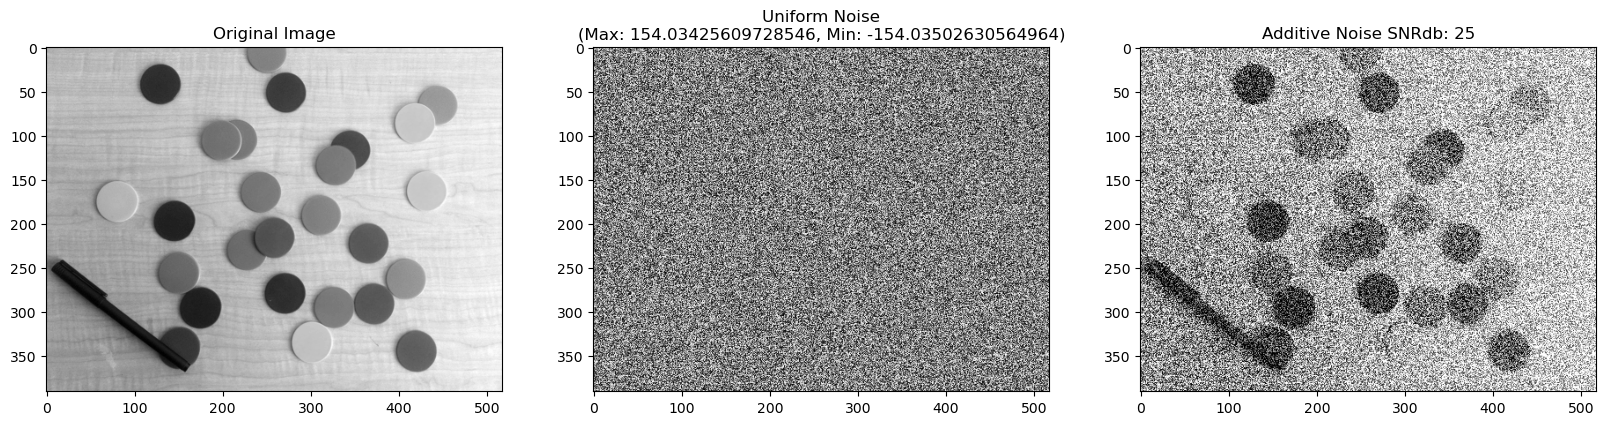

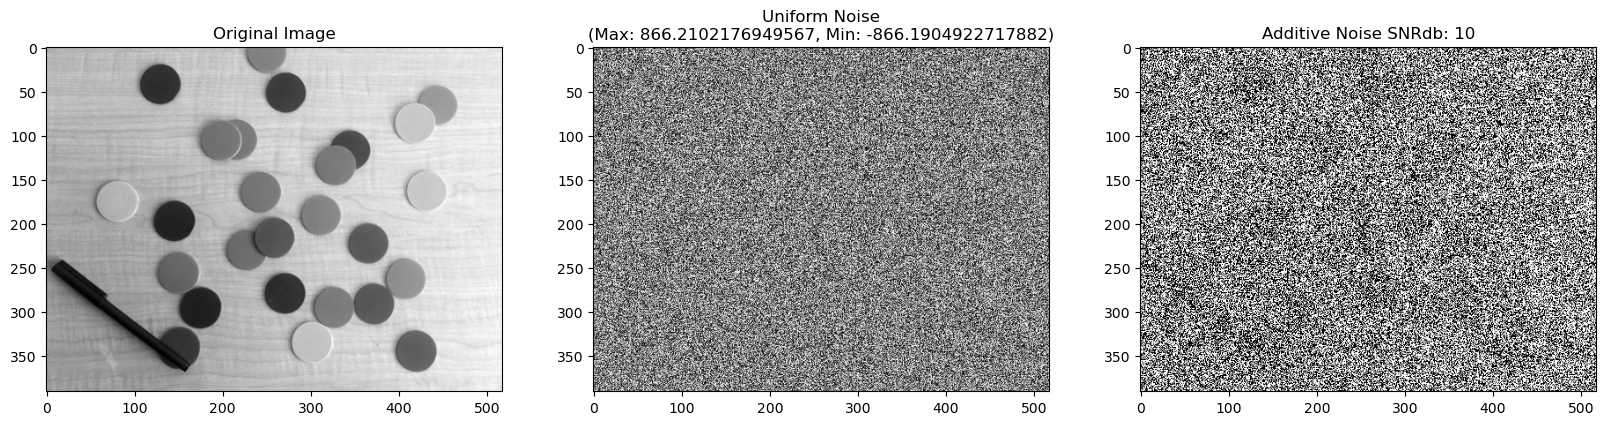

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray, cmap="gray")
plt.title("Original Image");

plt.subplot(132)
plt.imshow(Nu_25db, cmap="gray")
plt.title(f"Uniform Noise\n(Max: {np.max(Nu_25db)}, Min: {np.min(Nu_25db)})");

plt.subplot(133)
plt.imshow(gray_25db, cmap="gray")
plt.title("Additive Noise SNRdb: 25");

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray, cmap="gray")
plt.title("Original Image");

plt.subplot(132)
plt.imshow(Nu_10db, cmap="gray")
plt.title(f"Uniform Noise\n(Max: {np.max(Nu_10db)}, Min: {np.min(Nu_10db)})");

plt.subplot(133)
plt.imshow(gray_10db, cmap="gray")
plt.title("Additive Noise SNRdb: 10");

### **Questão 04)** Filtragem

Codifique a aplicação do filtro gaussiano e filtro da mediana nas imagens corrompidas com ruído. Use uma janela $11\times 11$ para a aplicação dos filtros pedidos. Para o filtro gaussiano, use $\sigma=2.5$. Em seguida aplique o detector de bordas de Canny com limiares $th_min=50$ e $th_max=120$ nas as imagens filtradas e comente o resultado. Qual o efeito observado nas bordas quando comparados os dois tipos de filtragem.

**Apresentação do resultado**
Para cada tipo de filtro, apresente uma matriz $2\times 3$ de figuras, a primeira linha contendo o resultado da aplicação do filtro na imagem `gray`, na imagem `gray_25db` e na imagem `gra_10db`.

#### Avaliação do filtro Gaussiano

O filtro gaussiano faz uso de um kernel gaussiano que é convolvido à imagem. Bem, como a transformada de Fourier de uma Gaussiana é outra Gaussiana, a aplicação desse filtro tem o efeito de reduzir componentes de alta frequência nas imagens, ou seja, este filtro funciona com um filtro passa-baixa. Durante sua aplicação, os pixeis no centro da região recebem valores maiores enquanto os das bordas recebem valores menores, preservando assim bordas e limites de objetos presentes na imagem. Este filtro também tem kernel separável, o que significa que sua matriz NxN pode ser representado por um vetor linha 1xN e um vetor coluna Nx1.

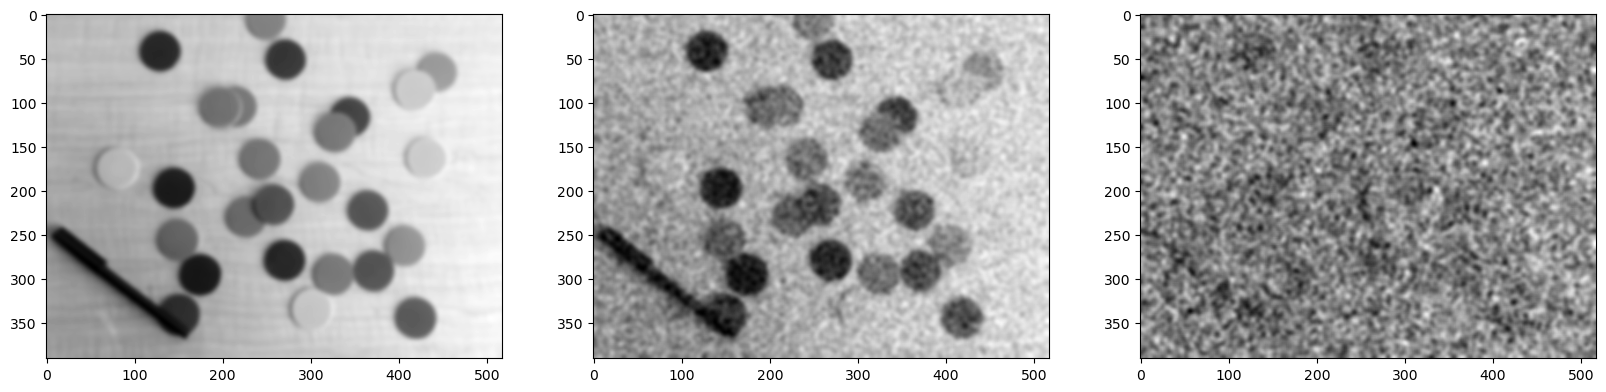

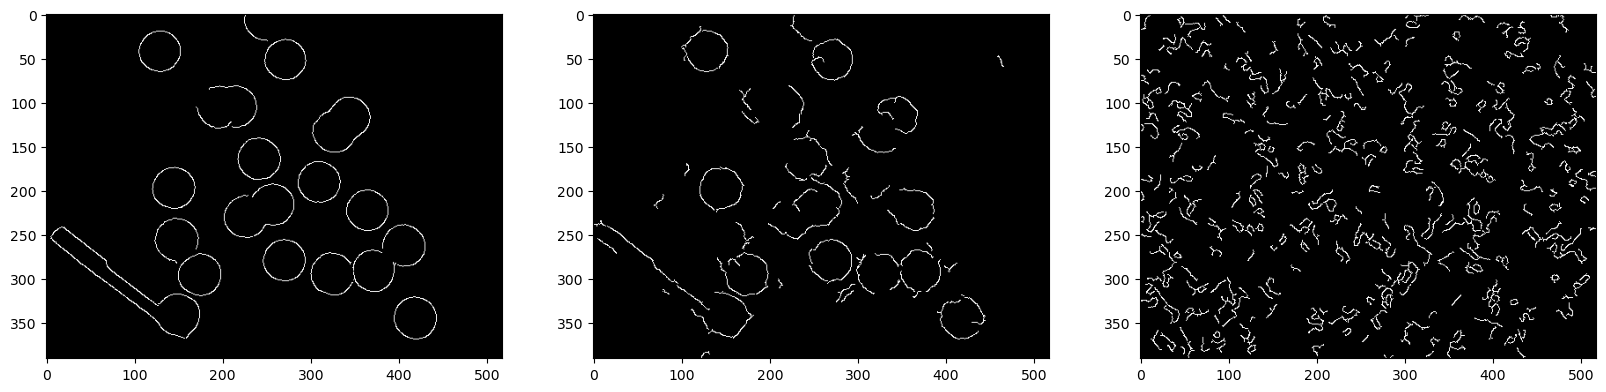

In [6]:
gray_gaussian_filter = cv.GaussianBlur(gray.astype(np.uint8), (11,11), 2.5)
gray_25db_gaussian_filter = cv.GaussianBlur(gray_25db.astype(np.uint8), (11,11), 2.5)
gray_10db_gaussian_filter = cv.GaussianBlur(gray_10db.astype(np.uint8), (11,11), 2.5)

canny_gray_gaussian_filter = cv.Canny(gray_gaussian_filter, 50,120)
canny_gray_25db_gaussian_filter = cv.Canny(gray_25db_gaussian_filter, 50,120)
canny_gray_10db_gaussian_filter = cv.Canny(gray_10db_gaussian_filter, 50,120)


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray_gaussian_filter, cmap="gray");

plt.subplot(132)
plt.imshow(gray_25db_gaussian_filter, cmap="gray");

plt.subplot(133)
plt.imshow(gray_10db_gaussian_filter, cmap="gray");

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(canny_gray_gaussian_filter, cmap="gray");

plt.subplot(132)
plt.imshow(canny_gray_25db_gaussian_filter, cmap="gray");

plt.subplot(133)
plt.imshow(canny_gray_10db_gaussian_filter, cmap="gray");

#### Avaliação do filtro da Mediana

O filtro da mediana, diferente do filtro Gaussiano, não realiza a operação de convolução entre a imagem e o filtro, neste caso ele considera todos o pixeis na aréa da imagem que corresponde ao kernel do filtro e substitue o seu ponto central pela mediana dos valores da região de borda. Este filtro é bastante eficaz para lidar com ruidos do tipo Salt & Pepper, uma vez que ruídos deste tipo são pontos onde o valor do pixel assume 0 ou 255. Este filtro também tem a caracteristica de suavizar os limites dos objetos, não preservando assim a informação de borda e de cantos.

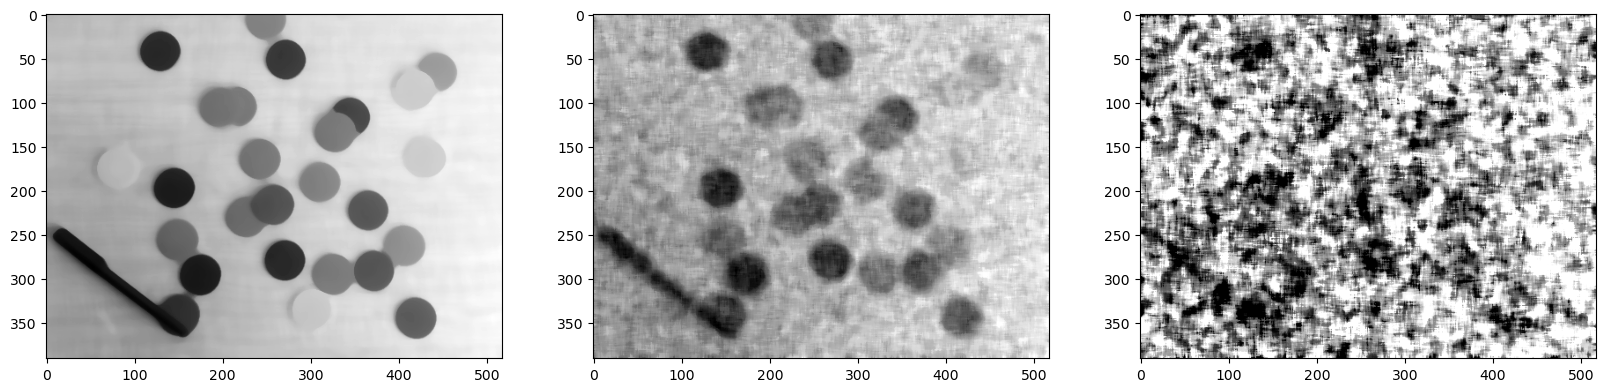

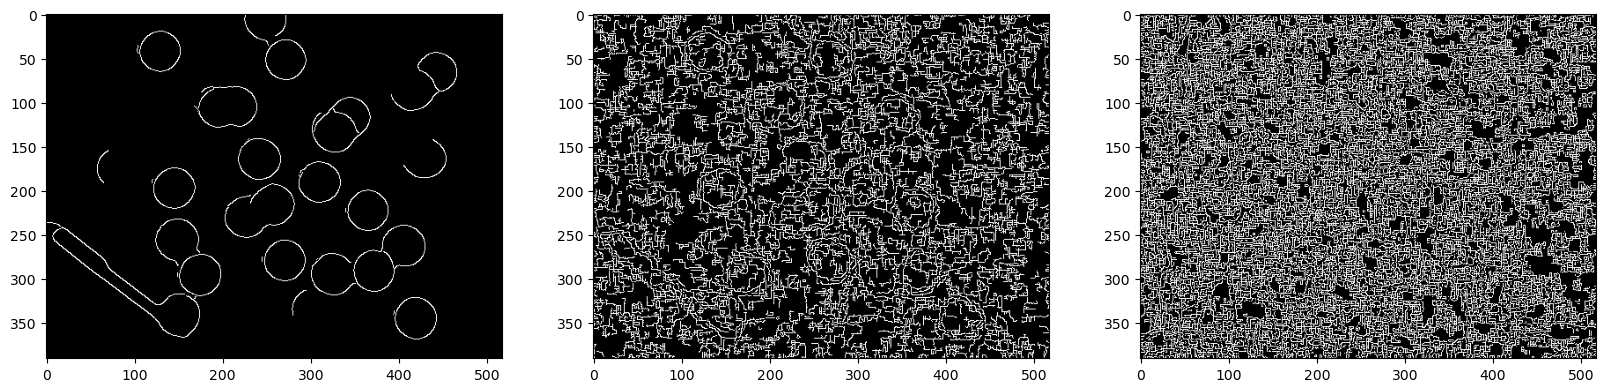

In [7]:

gray_median_filter = cv.medianBlur(gray.astype(np.uint8), 11)
gray_25db_median_filter = cv.medianBlur(gray_25db.astype(np.uint8), 11)
gray_10db_median_filter = cv.medianBlur(gray_10db.astype(np.uint8), 11)

canny_gray_median_filter = cv.Canny(gray_median_filter, 50,120)
canny_gray_25db_median_filter = cv.Canny(gray_25db_median_filter, 50,120)
canny_gray_10db_median_filter = cv.Canny(gray_10db_median_filter, 50,120)


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(gray_median_filter, cmap="gray");

plt.subplot(132)
plt.imshow(gray_25db_median_filter, cmap="gray");

plt.subplot(133)
plt.imshow(gray_10db_median_filter, cmap="gray");

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(canny_gray_median_filter, cmap="gray");

plt.subplot(132)
plt.imshow(canny_gray_25db_median_filter, cmap="gray");

plt.subplot(133)
plt.imshow(canny_gray_10db_median_filter, cmap="gray");
